In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [170]:
import os
import pandas as pd
from fbprophet import Prophet
import numpy as np

# Data Load

## Using os package

In [171]:
p = os.getcwd()
print(p)

/content


In [172]:
os.listdir(p)

['.config', 'drive', 'sample_data']

In [173]:
data_dir = os.path.join(os.getcwd(), "drive", "MyDrive", "Multi", "Data")
data_dir

'/content/drive/MyDrive/Multi/Data'

In [174]:
# os.path의 is file method.
# 해당 경로가 파일인지 확인하는 method. 비슷한 method로 isdir 등이 있다.
f_names = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]
f_names

['/content/drive/MyDrive/Multi/Data/경기도.csv']

In [175]:
os.listdir(data_dir)

['경기도.csv']

## Opening csv data file

In [176]:
data = pd.read_csv(f_names[0], encoding='cp949')
data.head()

,date,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,...,용인시,파주시,이천시,안성시,김포시,화성시,광주시,양주시,포천시,여주시
0,2013-01-01,63.4,67.8,77.7,60.5,68.1,53.0,92.6,92.6,66.8,...,68.8,82.3,89.2,92.6,71.1,73.0,82.4,82.0,93.6,102.8
1,2013-02-01,63.3,67.2,77.4,60.2,67.7,52.9,92.5,90.9,66.6,...,68.5,81.9,89.4,92.8,70.9,72.9,82.0,81.7,93.6,102.8
2,2013-03-01,63.2,66.9,76.9,60.0,67.4,52.6,92.4,90.1,66.3,...,68.4,81.6,89.7,92.8,70.8,72.8,81.9,81.4,93.6,102.7
3,2013-04-01,63.3,67.1,76.4,59.8,67.4,52.6,92.4,90.0,66.3,...,68.4,80.6,90.1,93.5,70.7,73.2,82.3,81.7,93.9,102.7
4,2013-05-01,63.4,67.5,76.4,59.6,67.6,52.9,92.4,89.8,66.6,...,68.5,80.7,90.4,93.8,71.0,73.6,82.3,81.9,94.7,103.6


In [177]:
data.tail()

,date,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,...,용인시,파주시,이천시,안성시,김포시,화성시,광주시,양주시,포천시,여주시
106,2021-11-01,109.5,104.8,107.2,111.7,110.2,107.3,113.2,107.7,110.7,...,107.1,106.9,110.3,114.8,105.3,111.6,107.9,109.5,108.4,106.6
107,2021-12-01,109.8,105.1,107.4,112.0,110.8,107.4,114.1,107.5,111.2,...,107.5,107.2,112.3,116.1,105.6,111.6,108.4,109.8,109.0,107.2
108,2022-01-01,109.8,105.1,107.4,111.8,110.8,107.3,114.3,107.5,111.3,...,107.6,107.5,113.3,116.9,105.6,111.5,108.7,109.8,109.2,107.1
109,2022-02-01,109.6,105.0,107.3,111.6,110.7,107.3,114.3,107.4,111.3,...,107.4,107.8,114.2,117.0,105.6,111.0,108.7,109.7,109.3,107.1
110,2022-03-01,109.4,105.0,107.3,111.2,110.6,107.2,114.4,107.4,111.2,...,107.1,108.0,115.5,117.5,105.6,110.4,108.5,109.8,109.3,107.1


# FaceBook PROPHET Basic

## Format the Data

In [178]:
df = data[['date', '수원시']]

In [179]:
df.columns = ['ds','y']

In [180]:
df['ds'] = pd.to_datetime(df['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Create and Fit Model

In [181]:
prediction_size = 12
train = df[:-prediction_size]
test = df[-prediction_size:]

In [182]:
m = Prophet(changepoint_range=0.8, changepoint_prior_scale=0.01)
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


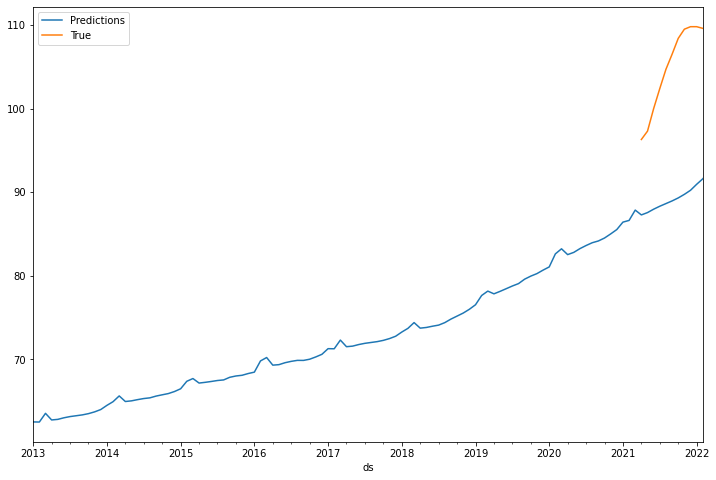

In [183]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True',legend=True,ax=ax,xlim=('2013-01-01','2022-02-01'))

In [184]:
m = Prophet(changepoint_range=0.8, changepoint_prior_scale=0.05)
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


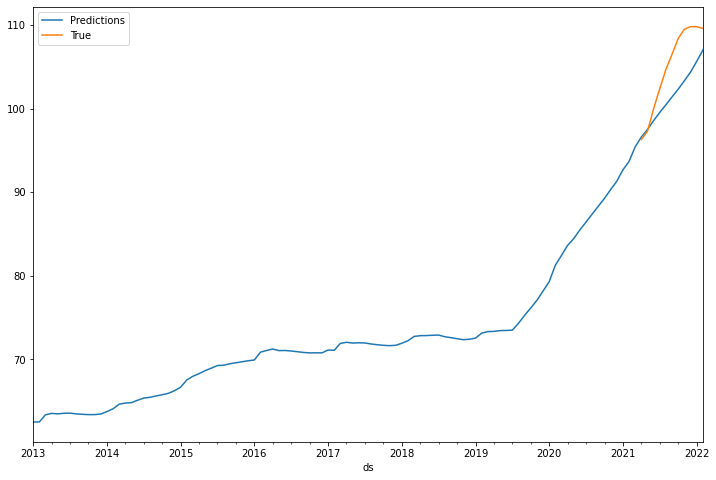

In [185]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True',legend=True,ax=ax,xlim=('2013-01-01','2022-02-01'))

In [186]:
df.head()

,ds,y
0,2013-01-01,63.4
1,2013-02-01,63.3
2,2013-03-01,63.2
3,2013-04-01,63.3
4,2013-05-01,63.4


### Step 1: Create "future" placeholder dataframe

In [187]:
df.tail()

,ds,y
106,2021-11-01,109.5
107,2021-12-01,109.8
108,2022-01-01,109.8
109,2022-02-01,109.6
110,2022-03-01,109.4


In [188]:
future.tail()

,ds
106,2021-11-01
107,2021-12-01
108,2022-01-01
109,2022-02-01
110,2022-03-01


In [189]:
len(df)

111

In [190]:
len(future)


111

### Step 2: Predict and fill in the Future

In [191]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,62.792850,61.436864,63.630458,62.792850,62.792850,-0.290192,-0.290192,-0.290192,-0.290192,-0.290192,-0.290192,0.0,0.0,0.0,62.502658
1,2013-02-01,62.906792,61.358875,63.594496,62.906792,62.906792,-0.392594,-0.392594,-0.392594,-0.392594,-0.392594,-0.392594,0.0,0.0,0.0,62.514198
2,2013-03-01,63.009708,62.242680,64.544243,63.009708,63.009708,0.359520,0.359520,0.359520,0.359520,0.359520,0.359520,0.0,0.0,0.0,63.369227
3,2013-04-01,63.123649,62.341467,64.720131,63.123649,63.123649,0.412592,0.412592,0.412592,0.412592,0.412592,0.412592,0.0,0.0,0.0,63.536241
4,2013-05-01,63.233916,62.323118,64.582173,63.233916,63.233916,0.249855,0.249855,0.249855,0.249855,0.249855,0.249855,0.0,0.0,0.0,63.483771


In [192]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
106,2021-11-01,103.845945,102.016960,104.515255,103.273905,104.430938,-0.519650,-0.519650,-0.519650,-0.519650,-0.519650,-0.519650,0.0,0.0,0.0,103.326295
107,2021-12-01,104.919630,102.992552,105.643679,104.225217,105.626224,-0.557684,-0.557684,-0.557684,-0.557684,-0.557684,-0.557684,0.0,0.0,0.0,104.361945
108,2022-01-01,106.029104,104.215950,107.207939,105.193773,106.865462,-0.385581,-0.385581,-0.385581,-0.385581,-0.385581,-0.385581,0.0,0.0,0.0,105.643523
109,2022-02-01,107.138579,105.329213,108.532238,106.158895,108.123723,-0.163646,-0.163646,-0.163646,-0.163646,-0.163646,-0.163646,0.0,0.0,0.0,106.974933
110,2022-03-01,108.140685,106.813278,110.005688,107.045501,109.230787,0.289842,0.289842,0.289842,0.289842,0.289842,0.289842,0.0,0.0,0.0,108.430527


In [193]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [194]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
99,2021-04-01,96.599583,95.436847,97.772888
100,2021-05-01,97.510531,96.324283,98.735482
101,2021-06-01,98.570704,97.393411,99.787267
102,2021-07-01,99.550700,98.442845,100.731752
103,2021-08-01,100.459606,99.331991,101.644302
104,2021-09-01,101.405926,100.173238,102.678847
105,2021-10-01,102.330707,101.026832,103.563582
106,2021-11-01,103.326295,102.016960,104.515255
107,2021-12-01,104.361945,102.992552,105.643679
108,2022-01-01,105.643523,104.215950,107.207939


### Plotting Forecast

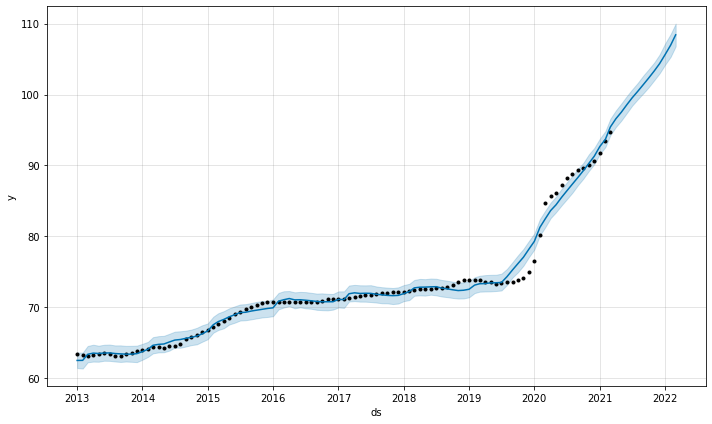

In [195]:
m.plot(forecast);

ConversionError: ignored

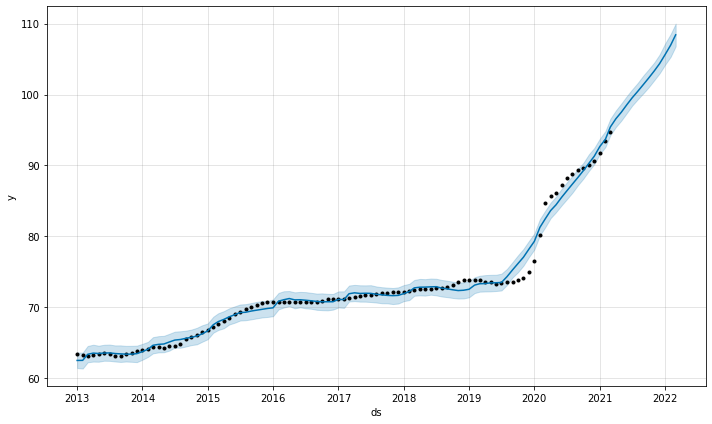

In [196]:
import matplotlib.pyplot as plt
%matplotlib inline
m.plot(forecast)
plt.xlim('2013-01-01','2022-02-01');

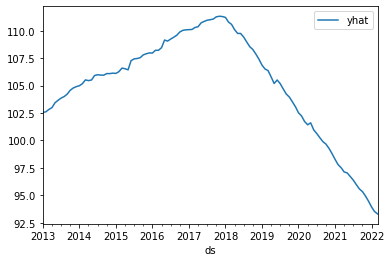

In [215]:
forecast.plot(x='ds',y='yhat');

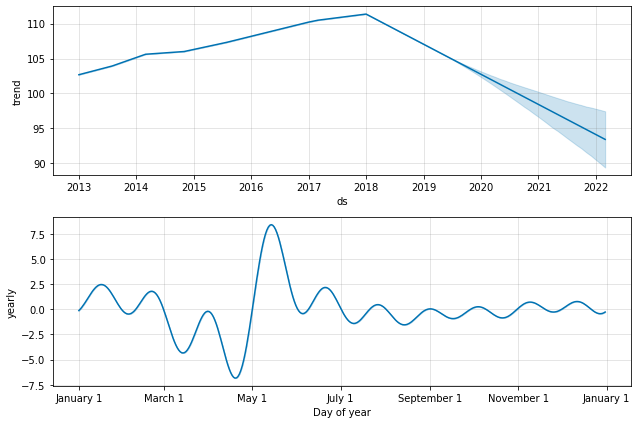

In [216]:
m.plot_components(forecast);


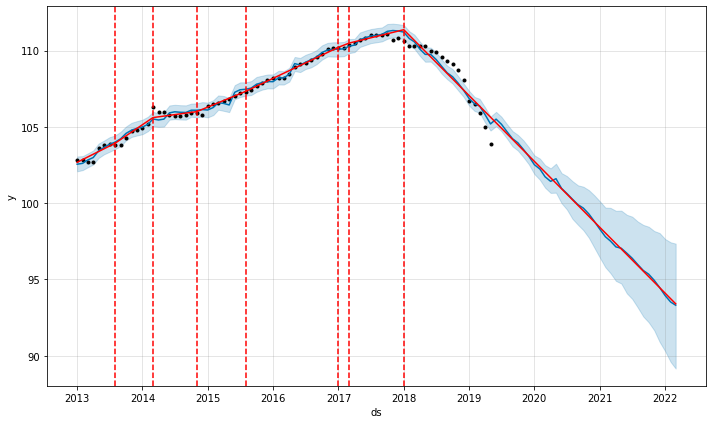

In [217]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## Uncertainty Intervals
changepoint_prior_scale을 조절하면 예측 불확실성이 증가함

interval_width의 기본 값은 80%

### Uncertainty in the trend

In [ ]:
#forecast = Prophet(interval_width=0.95).fit(df).predict(future)

### Uncertainty in seasonality

시즈널리티의 불확실성을 알기 위해 베이지안 샘플링을 사용해야 함

mcmc.samples 파라미터를 사용. 이 값을 사용하면 최초 n일에 대해 적용한다는 뜻

In [ ]:
#m = Prophet(mcmc_samples=300)
#forecast = m.fit(df).predict(future)
#fig = m.plot_components(forecast)

## Outliers

너무 튀는 값이 존재해서 예측할 때 영향이 미치므로 제외하고 예측해야 함 ->NA, None로 설정

In [ ]:
# df.loc[(df['ds'] > '2015-01-01') & (df['ds'] < '2016-01-01'), 'y'] = None
#  model = Prophet().fit(df)
#  fig = model.plot(model.predict(future))

# Evaluation

## short

In [218]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [219]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [220]:
cmp_df = make_comparison_dataframe(df, forecast)

cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2013-01-01,102.555248,102.088325,103.063532,102.8
2013-02-01,102.614083,102.170083,103.084617,102.8
2013-03-01,102.829991,102.351250,103.259342,102.7
2013-04-01,102.991663,102.534825,103.455671,102.7
2013-05-01,103.434754,102.963954,103.908689,103.6


In [221]:
def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [222]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 1.9216347659981718
MAE 2.001887536345241


## fbprophet.diagnostics

In [223]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [224]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [225]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2018-05-01 00:00:00 and 2018-05-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [226]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-06-01,110.508244,110.365515,110.641303,110.0,2018-05-01
1,2018-07-01,110.626817,110.391605,110.791675,109.9,2018-05-01
2,2018-08-01,110.617459,110.216157,110.962608,109.6,2018-05-01
3,2018-09-01,110.557305,109.886029,111.068953,109.3,2018-05-01
4,2018-10-01,110.615044,109.698951,111.365284,109.1,2018-05-01


In [227]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
7,2019-01-01,110.298043,108.310859,111.919778,106.7,2018-05-01
8,2019-02-01,110.052877,107.701284,111.960677,106.5,2018-05-01
9,2019-03-01,110.098610,107.308373,112.344715,105.9,2018-05-01
10,2019-04-01,109.913950,106.726272,112.614010,105.0,2018-05-01
11,2019-05-01,109.965883,106.419694,112.978390,103.9,2018-05-01


In [228]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,0.258312,0.508244,0.508244,0.004620,0.004620,0.0
1,61 days,0.528263,0.726817,0.726817,0.006613,0.006613,0.0
2,92 days,1.035223,1.017459,1.017459,0.009283,0.009283,0.0
3,123 days,1.580815,1.257305,1.257305,0.011503,0.011503,0.0
4,153 days,2.295358,1.515044,1.515044,0.013887,0.013887,0.0
5,184 days,3.267911,1.807736,1.807736,0.016631,0.016631,0.0
6,214 days,5.028167,2.242358,2.242358,0.020743,0.020743,0.0
7,245 days,12.945916,3.598043,3.598043,0.033721,0.033721,0.0
8,276 days,12.622937,3.552877,3.552877,0.033360,0.033360,0.0
9,304 days,17.628324,4.198610,4.198610,0.039647,0.039647,0.0


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


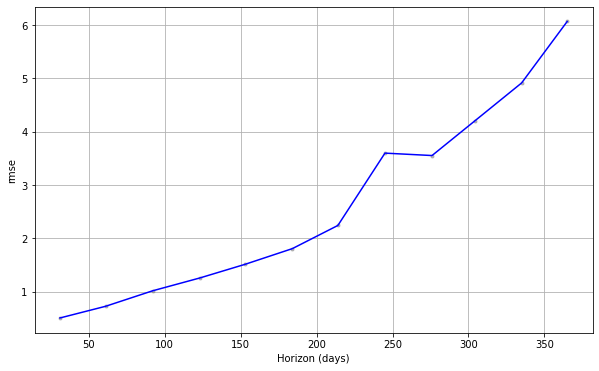

In [229]:
plot_cross_validation_metric(df_cv, metric='rmse');

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


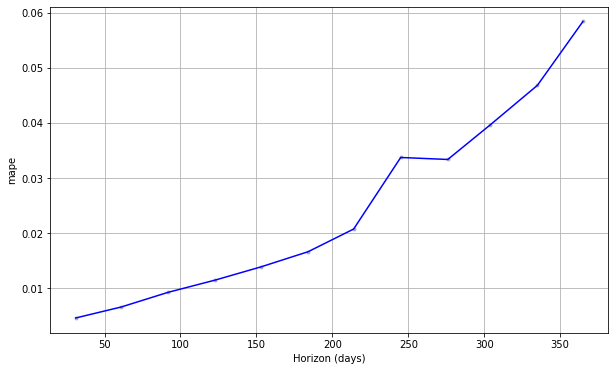

In [230]:
plot_cross_validation_metric(df_cv, metric='mape');

# 전체 Data

## 동적변수 생성

In [197]:
data.columns

Index(['date', '수원시', '성남시', '의정부시', '안양시', '부천시', '광명시', '평택시', '동두천시', '안산시',
       '고양시', '과천시', '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시',
       '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시', '포천시', '여주시'],
      dtype='object')

In [198]:
len(data.columns)

29

In [199]:
data.columns[28]

'여주시'

In [200]:
# prophet 사용위해 동적변수 생성
for i in range(1,29):
  df = data[['date', data.columns[i]]]
  df.columns = ['ds','y']
  df['ds'] = pd.to_datetime(df['ds'])
  globals()['df%d'%i] = df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## Create and Fit Model

In [201]:
# split
ratio = 0.7
prediction_size = int(len(df)*ratio)

In [202]:
prediction_size

77

In [203]:
# train, test 동적변수로 돌리기
for i in range(1,29):
  new = globals()['df%d'%i]
  train = new[:prediction_size]
  test = new[prediction_size:]
  globals()['train%d'%i] = train
  globals()['test%d'%i] = test

In [204]:
# train1~train28 학습
for i in range(1,29):
  ht = globals()['train%d'%i]
  m = Prophet(changepoint_range=0.8, changepoint_prior_scale=0.05)
  m.fit(ht)
  future = m.make_future_dataframe(periods=34,freq='MS')
  forecast = m.predict(future)
  globals()['forecast%d'%i] = forecast


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [205]:
forecast28

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,102.679072,102.088325,103.063532,102.679072,102.679072,-0.123824,-0.123824,-0.123824,-0.123824,-0.123824,-0.123824,0.0,0.0,0.0,102.555248
1,2013-02-01,102.862004,102.170083,103.084617,102.862004,102.862004,-0.247921,-0.247921,-0.247921,-0.247921,-0.247921,-0.247921,0.0,0.0,0.0,102.614083
2,2013-03-01,103.027234,102.351250,103.259342,103.027234,103.027234,-0.197243,-0.197243,-0.197243,-0.197243,-0.197243,-0.197243,0.0,0.0,0.0,102.829991
3,2013-04-01,103.210166,102.534825,103.455671,103.210166,103.210166,-0.218504,-0.218504,-0.218504,-0.218504,-0.218504,-0.218504,0.0,0.0,0.0,102.991663
4,2013-05-01,103.387198,102.963954,103.908689,103.387198,103.387198,0.047556,0.047556,0.047556,0.047556,0.047556,0.047556,0.0,0.0,0.0,103.434754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2021-11-01,94.824191,91.669363,98.176753,91.552985,98.107141,0.122586,0.122586,0.122586,0.122586,0.122586,0.122586,0.0,0.0,0.0,94.946778
107,2021-12-01,94.469622,90.915231,98.046065,91.063351,97.972638,0.008820,0.008820,0.008820,0.008820,0.008820,0.008820,0.0,0.0,0.0,94.478442
108,2022-01-01,94.103234,90.304535,97.653507,90.478619,97.792174,-0.156822,-0.156822,-0.156822,-0.156822,-0.156822,-0.156822,0.0,0.0,0.0,93.946412
109,2022-02-01,93.736846,89.593357,97.436627,89.915004,97.612119,-0.213815,-0.213815,-0.213815,-0.213815,-0.213815,-0.213815,0.0,0.0,0.0,93.523031


## forecast 추출

In [206]:
for i in range (1,29):
  ht2 = globals()['forecast%d'%i]
  globals()['predict%d'%i] = ht2[['ds', 'yhat']]

In [207]:
from functools import reduce

In [208]:
# merge 동적변수로 해보기
#for i in range (1,29):
#  this.merge(globals()['predict%d'%i], globals()['pred%d'%i], on "ds")

In [209]:
ht5 = [predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9, predict10, predict11, predict12, predict13, predict14, predict15, predict16, predict17, predict18, predict19, predict20, predict21, predict22, predict23, predict24, predict25, predict26, predict27, predict28]
경기도 = reduce(lambda left, right: pd.merge(left, right, on='ds'), ht5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'yhat_x'} in the result is deprecated and will raise a MergeError in a future version.
  


In [210]:
경기도

,ds,yhat_x,yhat_y,yhat_x,yhat_y,yhat_x,yhat_y,yhat_x,yhat_y,yhat_x,...,yhat_x,yhat_y,yhat_x,yhat_y,yhat_x,yhat_y,yhat_x,yhat_y,yhat_x,yhat_y
0,2013-01-01,63.371957,66.839704,77.702614,60.295040,68.023510,52.419997,92.342989,92.495073,66.336499,...,68.846048,82.177484,89.133794,92.527177,71.077800,73.038994,82.263690,81.951080,93.468070,102.555248
1,2013-02-01,63.302664,66.766279,77.360302,60.076141,67.772752,52.134184,92.498226,91.062224,66.535774,...,68.561720,81.779205,89.387541,92.892728,71.034143,72.941912,82.100292,81.774416,93.697110,102.614083
2,2013-03-01,63.330925,67.071351,76.901787,59.935745,67.543849,52.366692,92.512507,90.114848,66.524432,...,68.477829,81.426077,89.688849,92.992251,70.906278,73.028062,82.135726,81.667860,93.809804,102.829991
3,2013-04-01,63.310684,67.070877,76.534627,59.782944,67.401438,52.290175,92.519181,89.944818,66.559417,...,68.380620,80.942033,89.994747,93.407395,70.667208,73.119260,82.213336,81.644556,94.062818,102.991663
4,2013-05-01,63.317524,67.169185,76.301726,59.632205,67.359690,52.379655,92.582037,89.769453,66.650210,...,68.314052,80.663413,90.257838,93.619371,70.604130,73.242798,82.212698,81.644589,94.402936,103.434754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2021-11-01,77.598729,100.617062,82.613760,81.178166,86.690477,89.336980,68.840363,88.017884,52.947515,...,86.797106,79.461682,92.161847,72.793254,85.843034,81.926604,80.323534,83.903704,87.441586,94.946778
107,2021-12-01,77.777098,100.800811,82.603763,81.285452,86.877658,89.535812,68.333935,87.897020,52.503671,...,87.097174,78.941910,91.852434,72.300575,85.790202,81.895611,80.176551,83.773680,87.129145,94.478442
108,2022-01-01,77.867855,101.287000,82.575362,81.392738,87.024938,89.787141,67.870338,87.762191,52.149771,...,87.335805,78.544207,91.613264,72.028631,85.763578,81.886168,80.183249,83.637784,86.756663,93.946412
109,2022-02-01,77.905250,101.725473,82.562350,81.474431,87.065163,89.900154,67.373590,87.520937,51.649256,...,87.467001,78.321320,91.370486,71.371212,85.736356,81.842216,79.924813,83.463704,86.463049,93.523031


In [211]:
data.columns

Index(['date', '수원시', '성남시', '의정부시', '안양시', '부천시', '광명시', '평택시', '동두천시', '안산시',
       '고양시', '과천시', '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시',
       '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시', '포천시', '여주시'],
      dtype='object')

In [212]:
경기도.columns = ['date', '수원시', '성남시', '의정부시', '안양시', '부천시', '광명시', '평택시', '동두천시', '안산시',
       '고양시', '과천시', '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시',
       '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시', '포천시', '여주시']

In [213]:
경기도

,date,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,...,용인시,파주시,이천시,안성시,김포시,화성시,광주시,양주시,포천시,여주시
0,2013-01-01,63.371957,66.839704,77.702614,60.295040,68.023510,52.419997,92.342989,92.495073,66.336499,...,68.846048,82.177484,89.133794,92.527177,71.077800,73.038994,82.263690,81.951080,93.468070,102.555248
1,2013-02-01,63.302664,66.766279,77.360302,60.076141,67.772752,52.134184,92.498226,91.062224,66.535774,...,68.561720,81.779205,89.387541,92.892728,71.034143,72.941912,82.100292,81.774416,93.697110,102.614083
2,2013-03-01,63.330925,67.071351,76.901787,59.935745,67.543849,52.366692,92.512507,90.114848,66.524432,...,68.477829,81.426077,89.688849,92.992251,70.906278,73.028062,82.135726,81.667860,93.809804,102.829991
3,2013-04-01,63.310684,67.070877,76.534627,59.782944,67.401438,52.290175,92.519181,89.944818,66.559417,...,68.380620,80.942033,89.994747,93.407395,70.667208,73.119260,82.213336,81.644556,94.062818,102.991663
4,2013-05-01,63.317524,67.169185,76.301726,59.632205,67.359690,52.379655,92.582037,89.769453,66.650210,...,68.314052,80.663413,90.257838,93.619371,70.604130,73.242798,82.212698,81.644589,94.402936,103.434754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2021-11-01,77.598729,100.617062,82.613760,81.178166,86.690477,89.336980,68.840363,88.017884,52.947515,...,86.797106,79.461682,92.161847,72.793254,85.843034,81.926604,80.323534,83.903704,87.441586,94.946778
107,2021-12-01,77.777098,100.800811,82.603763,81.285452,86.877658,89.535812,68.333935,87.897020,52.503671,...,87.097174,78.941910,91.852434,72.300575,85.790202,81.895611,80.176551,83.773680,87.129145,94.478442
108,2022-01-01,77.867855,101.287000,82.575362,81.392738,87.024938,89.787141,67.870338,87.762191,52.149771,...,87.335805,78.544207,91.613264,72.028631,85.763578,81.886168,80.183249,83.637784,86.756663,93.946412
109,2022-02-01,77.905250,101.725473,82.562350,81.474431,87.065163,89.900154,67.373590,87.520937,51.649256,...,87.467001,78.321320,91.370486,71.371212,85.736356,81.842216,79.924813,83.463704,86.463049,93.523031


In [214]:
경기도.tail(3)

,date,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,...,용인시,파주시,이천시,안성시,김포시,화성시,광주시,양주시,포천시,여주시
108,2022-01-01,77.867855,101.287000,82.575362,81.392738,87.024938,89.787141,67.870338,87.762191,52.149771,...,87.335805,78.544207,91.613264,72.028631,85.763578,81.886168,80.183249,83.637784,86.756663,93.946412
109,2022-02-01,77.905250,101.725473,82.562350,81.474431,87.065163,89.900154,67.373590,87.520937,51.649256,...,87.467001,78.321320,91.370486,71.371212,85.736356,81.842216,79.924813,83.463704,86.463049,93.523031
110,2022-03-01,77.980517,102.129684,82.488831,81.632804,87.135210,90.033914,66.856249,87.494507,51.190321,...,87.744505,78.157881,91.168954,70.699081,85.728788,81.854215,79.860818,83.430162,86.240308,93.312275
